In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [5]:
# to show the version of those lib imported
print(f'pandas version: {pd.__version__}')
print(f'np version: {np.__version__}')
print(f'sns version: {sns.__version__}')

pandas version: 2.0.3
np version: 1.24.3
sns version: 0.12.2


In [6]:
# importing data from github
url = 'https://github.com/prasertcbs/basic-dataset/raw/master/Advertising.csv'
df = pd.read_csv(url, usecols=[1,2,3,4])
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [7]:
df.info() # to show all data about this df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


/Users/kritchaitriyavanich/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


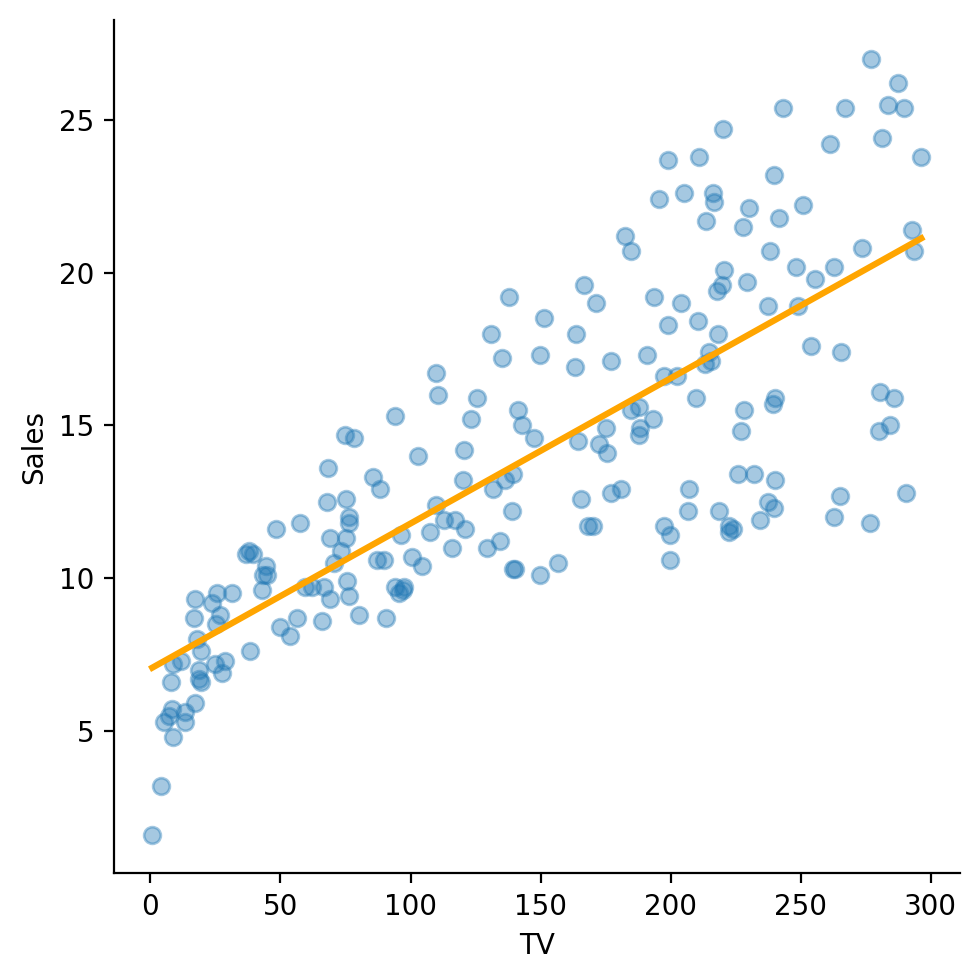

In [8]:
# plotting number of TV ads and Sales
sns.lmplot(x='TV', y='Sales', data=df, ci=None,
          scatter_kws={'alpha':0.4}, # making each dot abit transparent
          line_kws={'color': 'orange'}) # define the line's color

/Users/kritchaitriyavanich/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


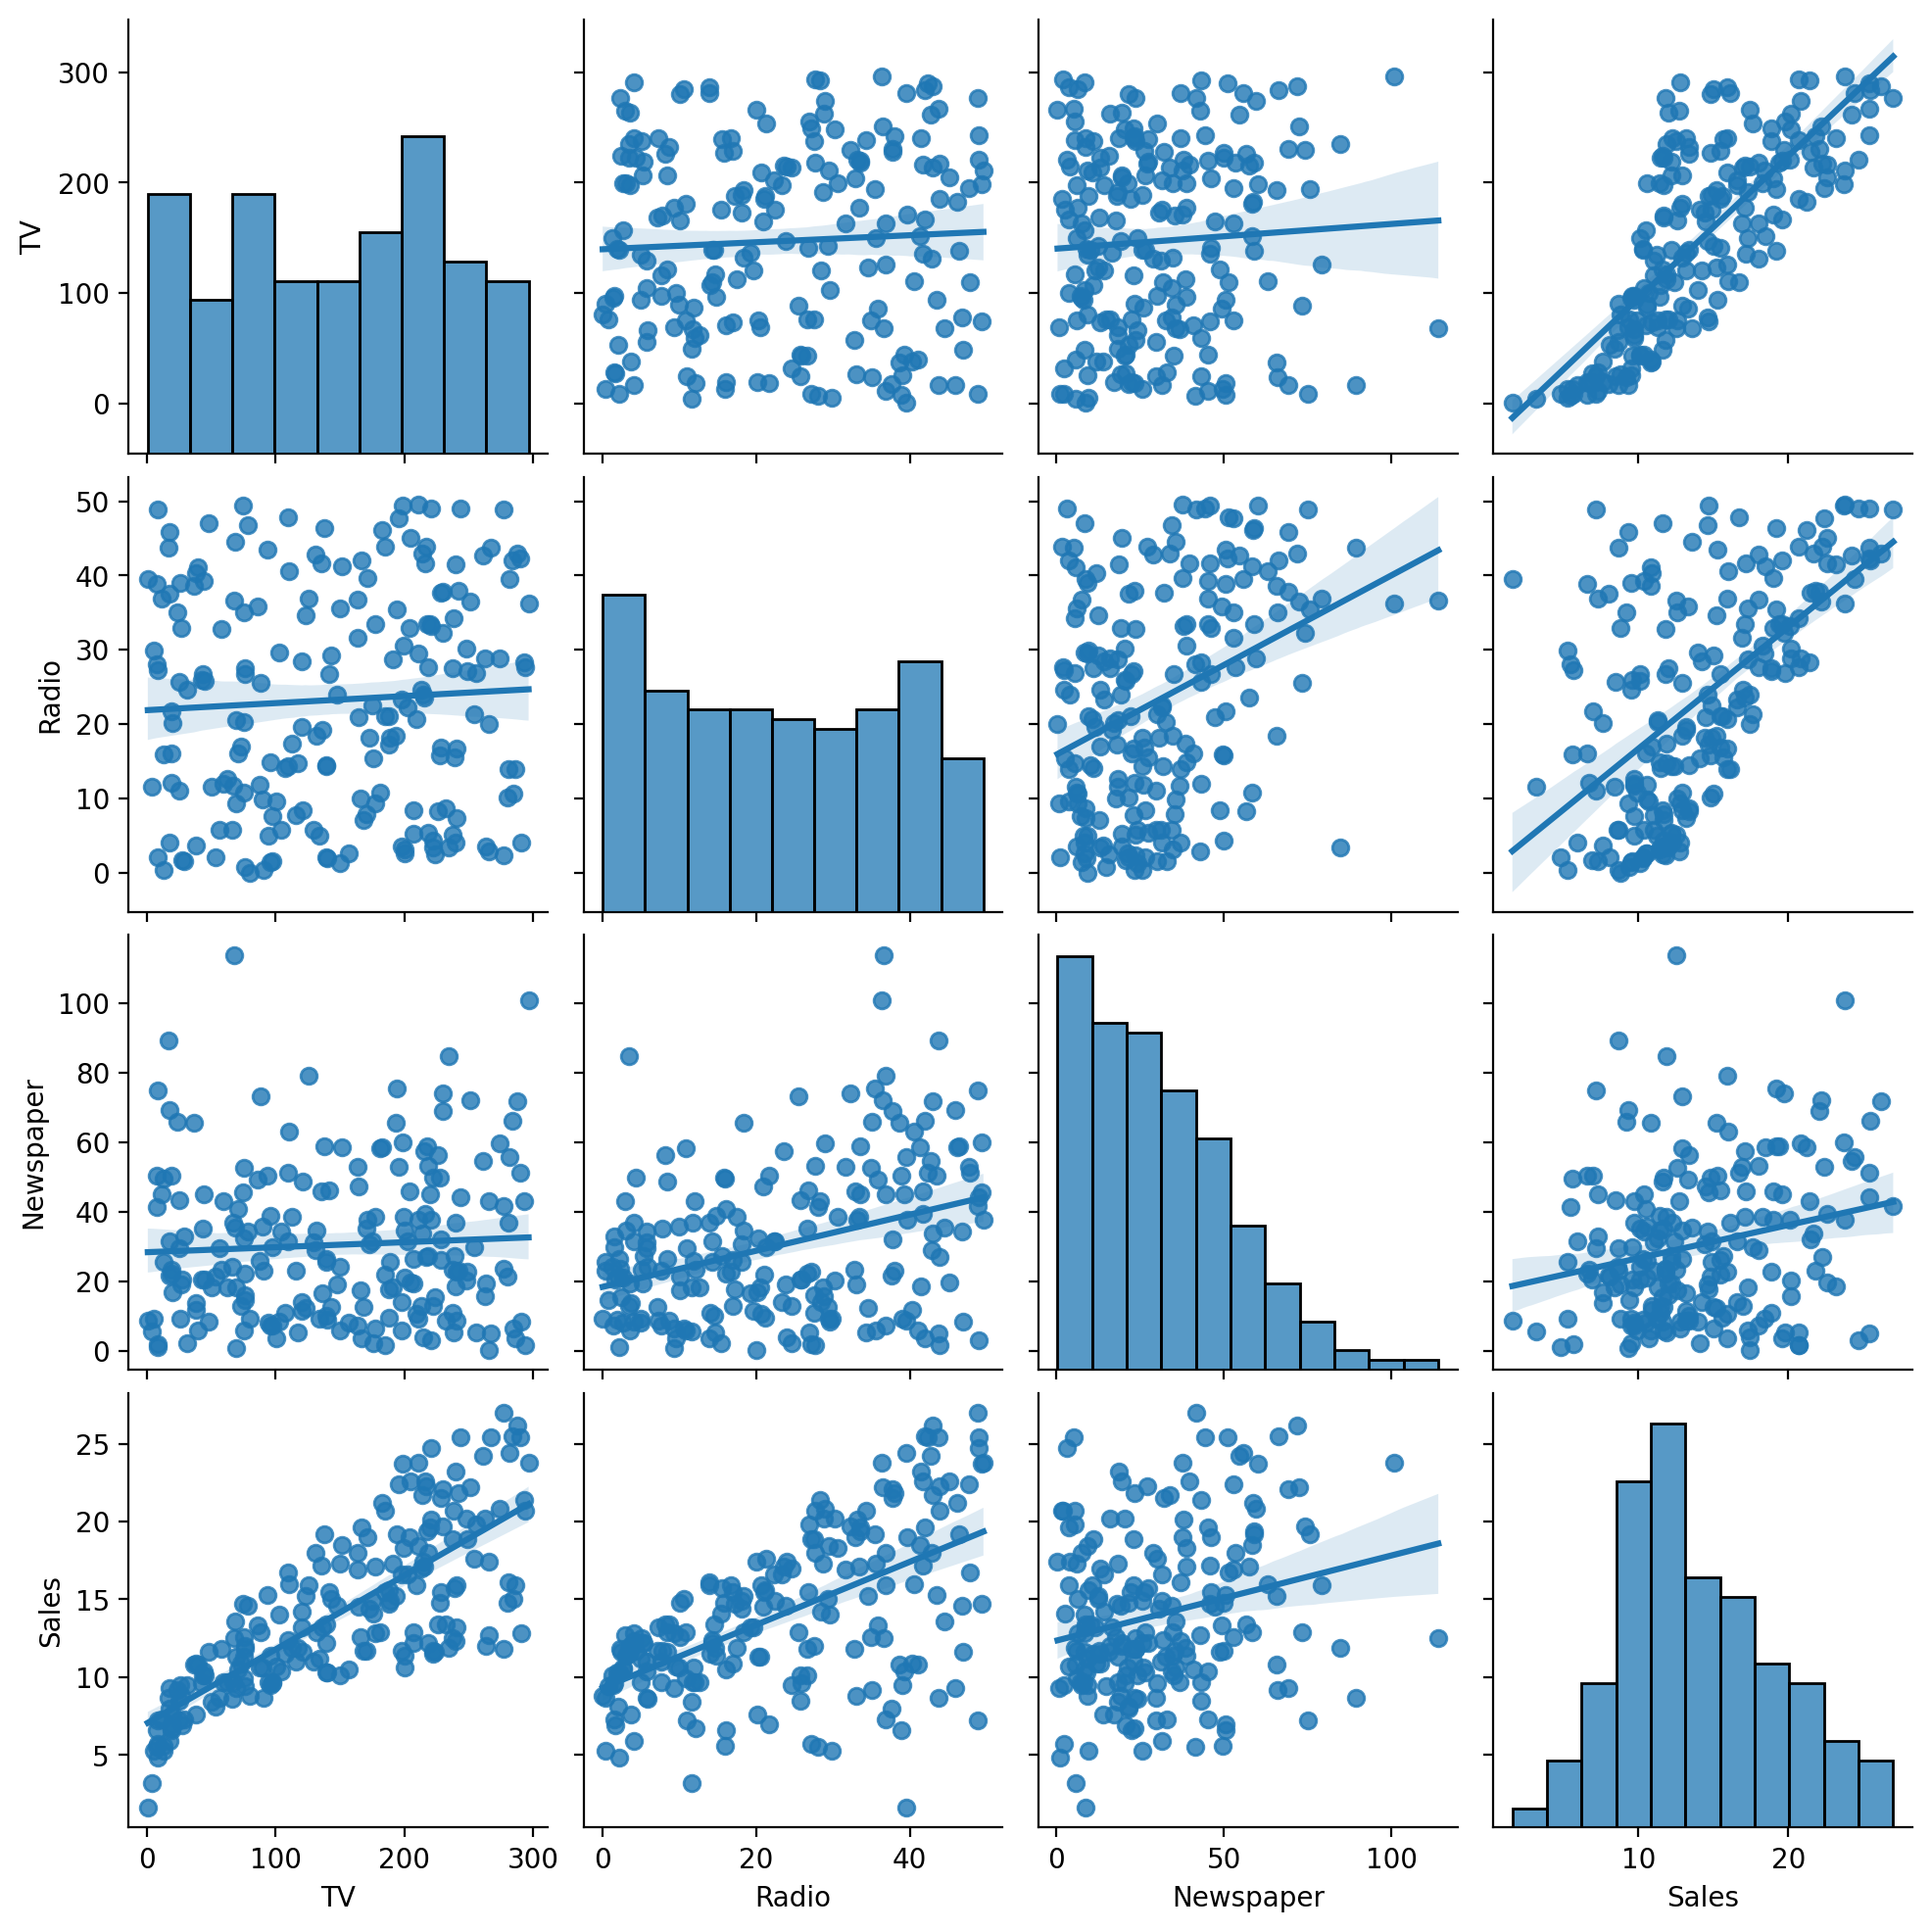

In [9]:
# or plotting regular pairplot
sns.pairplot(df, kind='reg')

/Users/kritchaitriyavanich/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


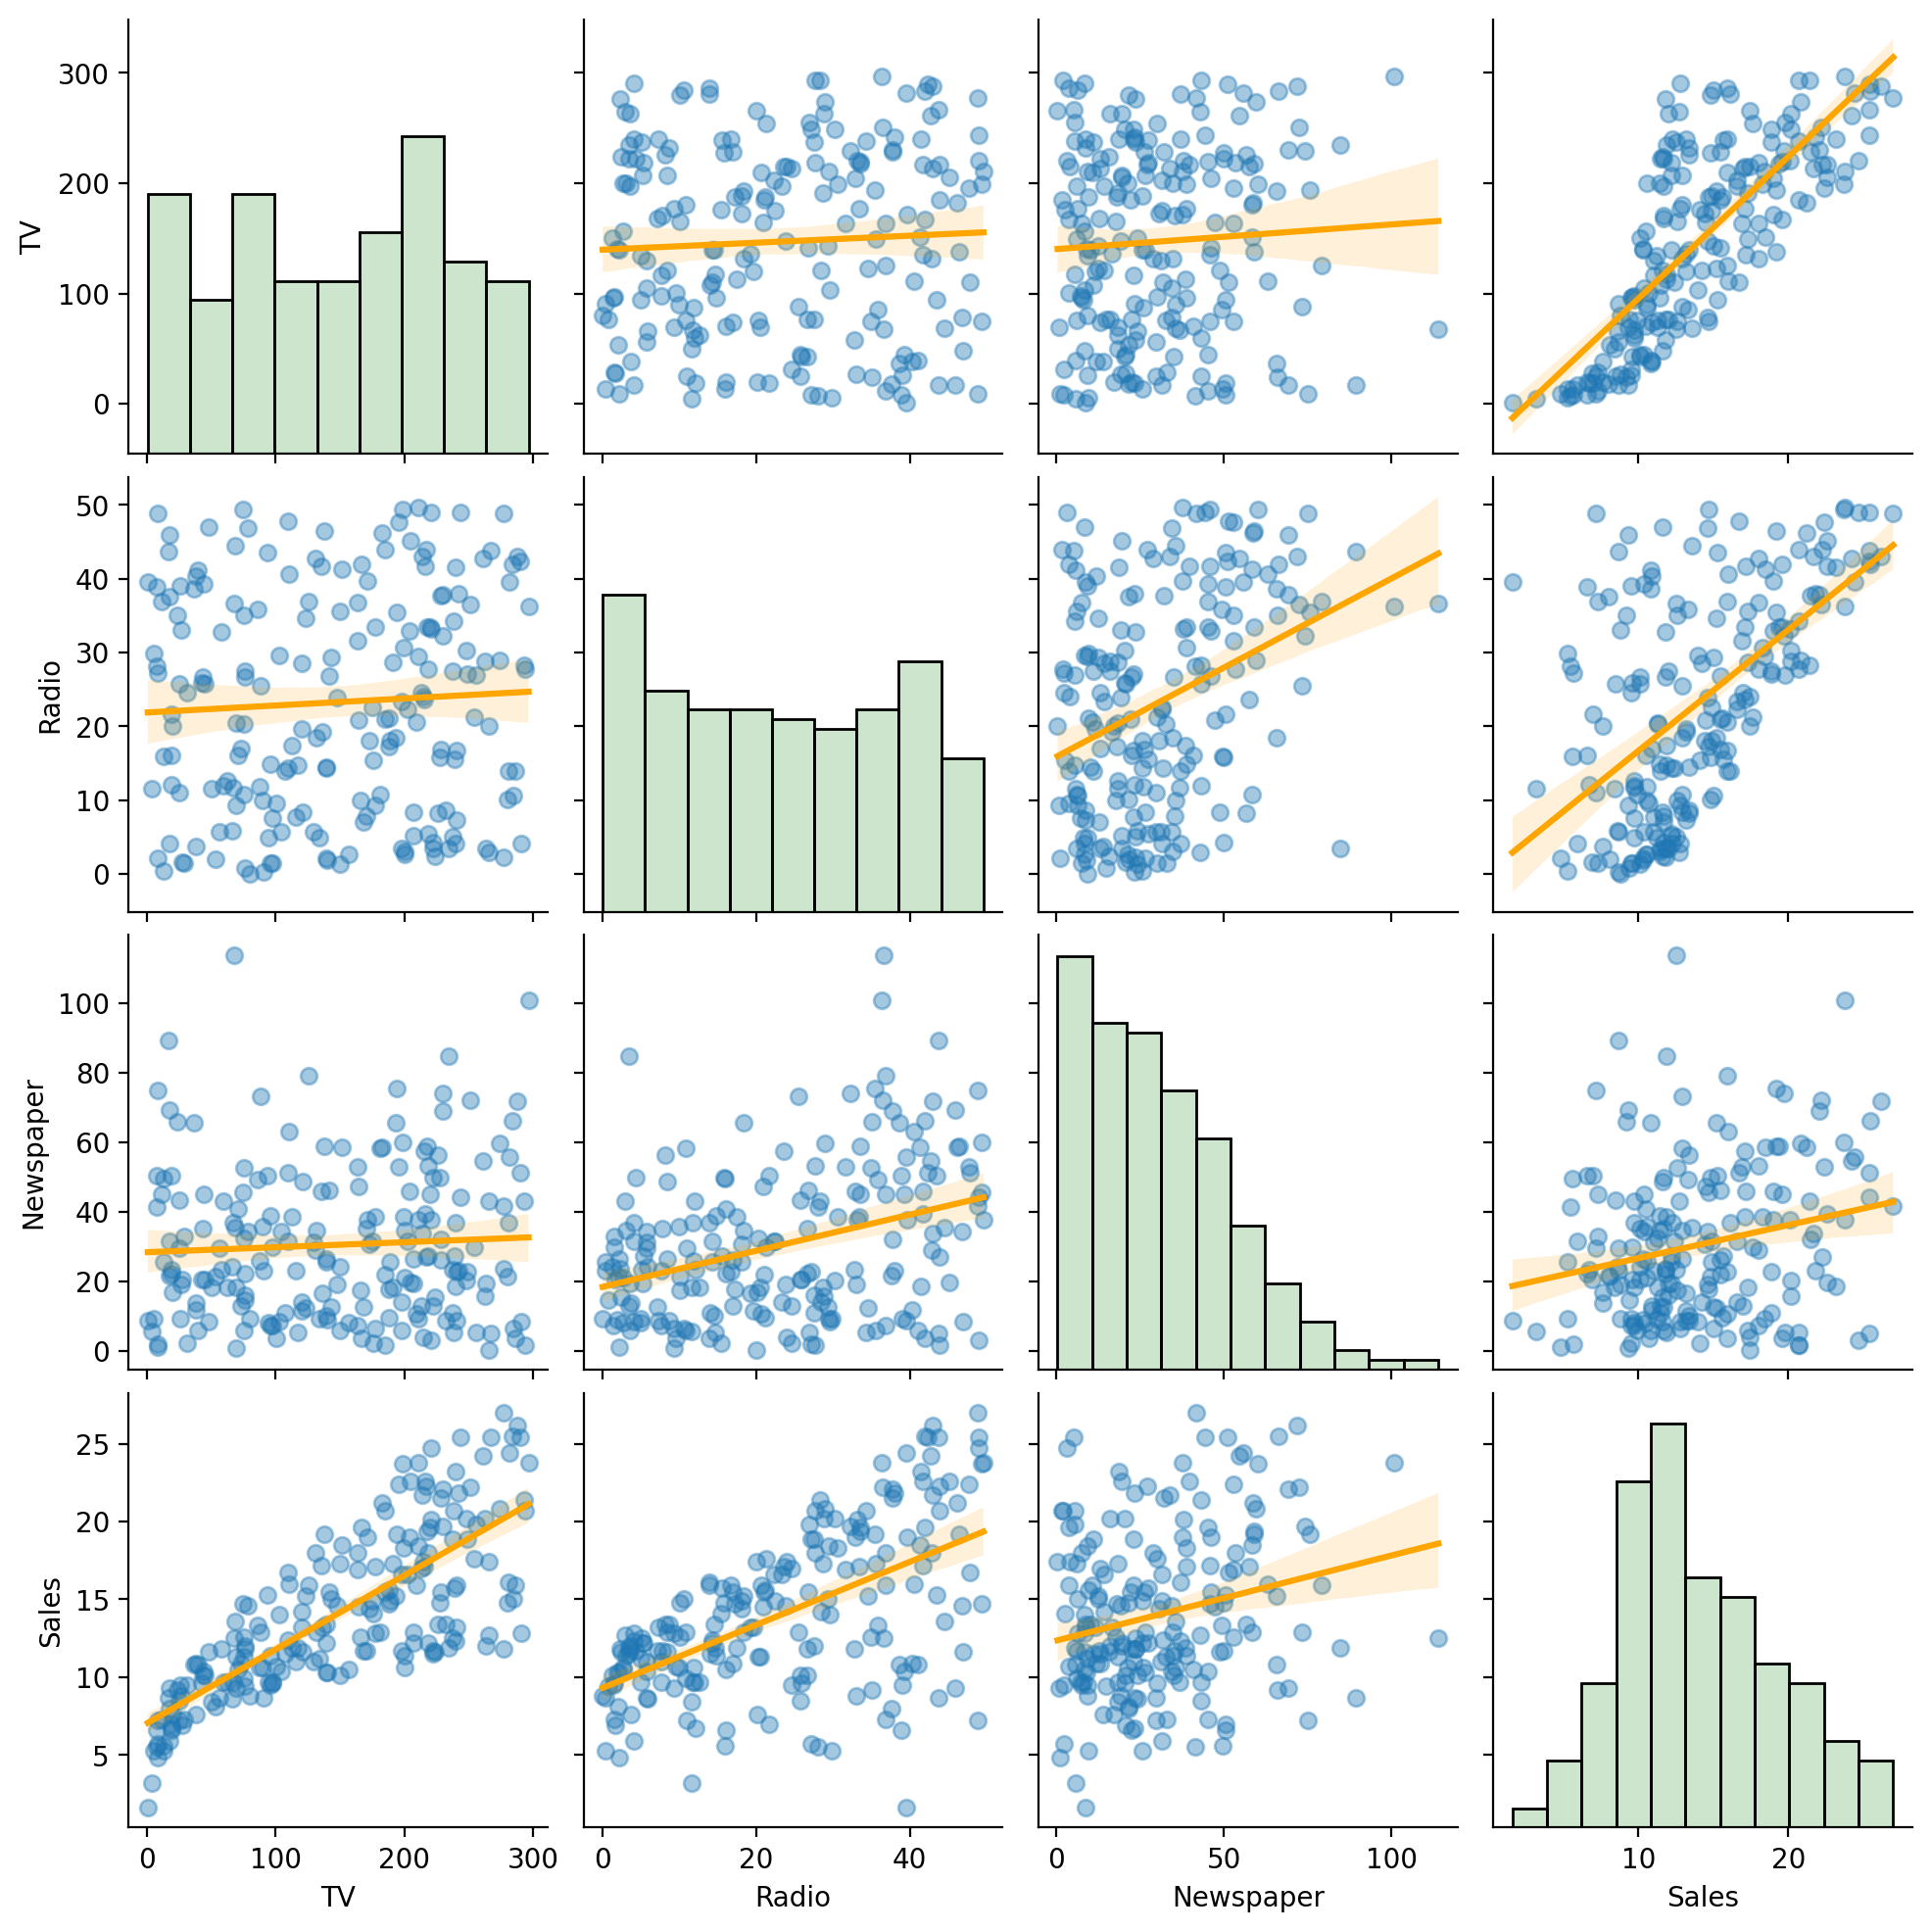

In [10]:
# abit configuration for more visibility
sns.pairplot(df,
            kind='reg',
            plot_kws={'scatter_kws': {'alpha': 0.4},
                     'line_kws': {'color': 'orange'}},
            diag_kws={'color': 'green', 'alpha' : 0.2})

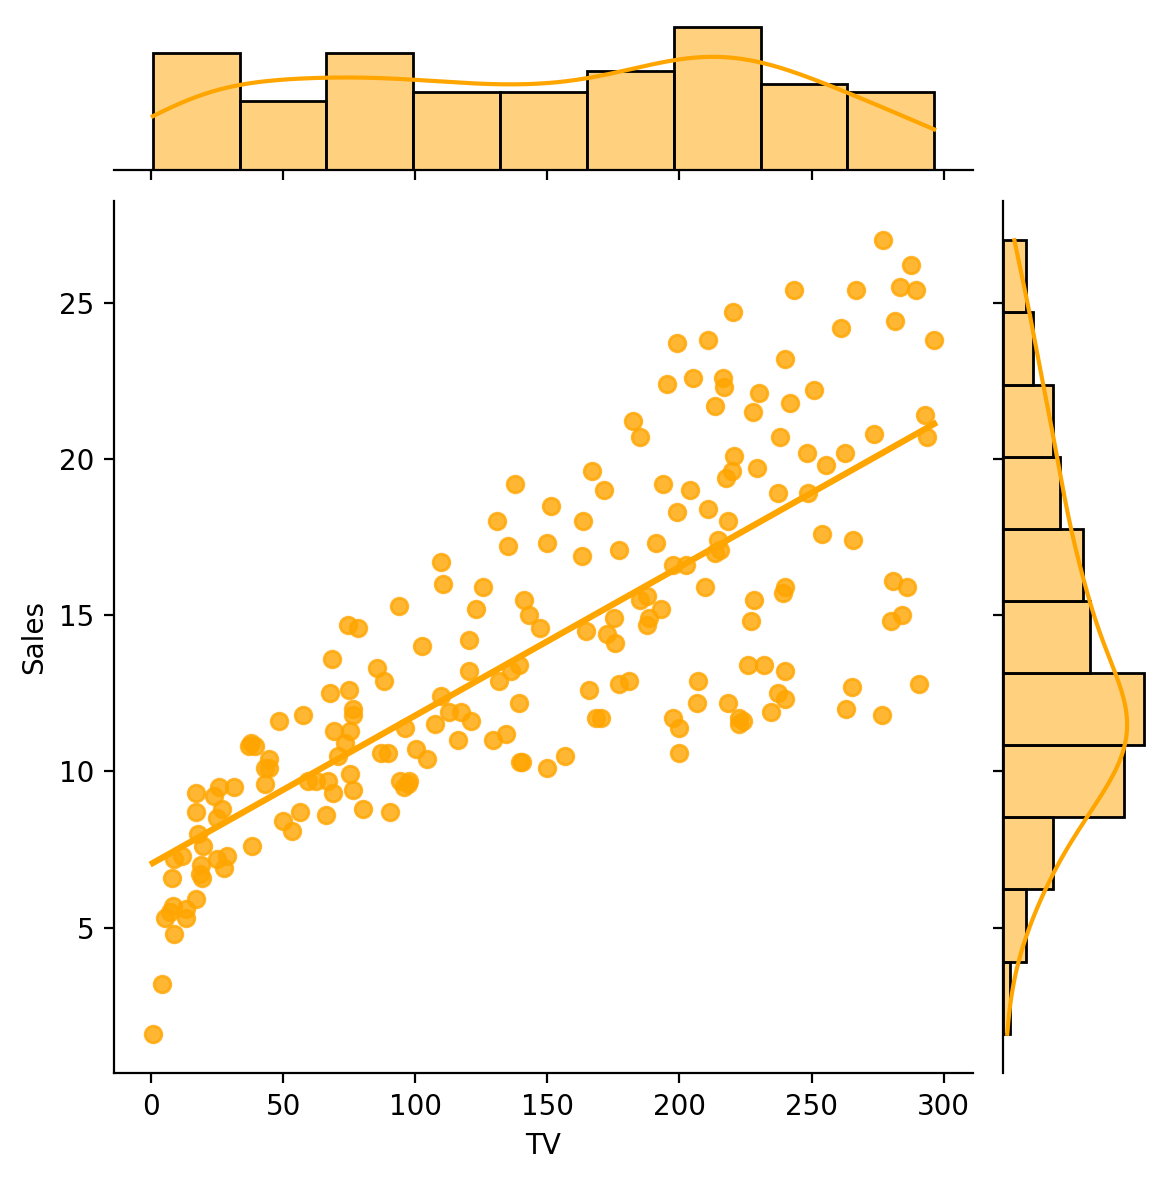

In [11]:
sns.jointplot(x='TV', y='Sales', data=df, kind='reg', ci=None, color='orange')

In [12]:
# before any further done we should do some visualization for our data to be able to see some relation
# before fitting the model

# sklearn: Linear Regression

In [13]:
import sklearn
from sklearn.linear_model import LinearRegression

In [14]:
print(f'sklearn version: {sklearn.__version__}')

sklearn version: 1.3.0


In [15]:
# initializing the model
model = LinearRegression()
model

LinearRegression()

In [16]:
# to see amount of data rows
len(df)

200

In [17]:
#  assigning data to variable => splitting data to train and test data
# first 140 are 'train data'
x = df.drop(columns=['Sales'])[:140]
y = df['Sales'][:140]
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [18]:
len(x)

140

In [19]:
x.head() # showing all thw train data in a df (ประหยัดที่)

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [20]:
model.fit(x,y)

LinearRegression()

In [21]:
model.score(x,y) # R-squared value

0.8937102367013778

In [22]:
model.coef_

array([ 0.04704868,  0.17968299, -0.00300557])

In [23]:
model.intercept_

3.045142209037124

In [24]:
# to predict value
model.predict([[200,40,70]]) # will predict sales out from the given data

/Users/kritchaitriyavanich/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([19.43180837])

In [25]:
model.predict([[200,40,70],
              [100,80,50],
              [40,20,10]])

/Users/kritchaitriyavanich/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([19.43180837, 21.97437115,  8.49069357])

In [26]:
# now for the rest of data we'll use it as the 'test data'
x_test = df.drop(columns = ['Sales'])[140:]
x_test.head(4)

,TV,Radio,Newspaper
140,73.4,17.0,12.9
141,193.7,35.4,75.6
142,220.5,33.2,37.9
143,104.6,5.7,34.4


In [27]:
# now predict the y_hat from our model
y_hat = model.predict(x_test)
y_hat # values predicted from our model

array([ 9.5143544 , 18.29202877, 19.27094064,  8.88723582, 10.11361706,
        9.96041972, 15.62706788, 23.1587013 , 12.03845031,  9.72212471,
       18.63809455, 10.10099867, 16.48589616, 18.12468609, 15.64364266,
        5.30523275, 15.12744231, 10.25358725, 10.09006252, 12.44362791,
       14.3210309 , 13.3616908 , 15.08443331, 17.32769433, 11.18435749,
       14.4341081 , 10.57847377, 13.65085298, 17.24682604, 18.30648623,
        7.42659652, 14.39756088,  7.52782982, 12.20541805, 14.08031808,
       24.73378746, 20.09744782, 12.3485591 , 16.40555117, 12.5803357 ,
       10.85519521, 14.21321462,  6.62420582, 24.08691176, 18.72317811,
       20.7349155 ,  9.90581943, 17.13834561, 18.98753788,  6.02878648,
       12.27110367,  8.5198605 ,  4.49610391, 18.42872767, 16.46701074,
        5.46575208,  8.33322951, 13.02457489, 23.73586521, 15.48426632])

In [28]:
# make it as a pretty df
# turns our y_hat from np.array to Series then concaternate with the df
dc = pd.concat([df[140:].reset_index(), pd.Series(y_hat, name='predicted')], axis='columns')
dc

,index,TV,Radio,Newspaper,Sales,predicted
0,140,73.4,17.0,12.9,10.9,9.514354
1,141,193.7,35.4,75.6,19.2,18.292029
2,142,220.5,33.2,37.9,20.1,19.270941
3,143,104.6,5.7,34.4,10.4,8.887236
4,144,96.2,14.8,38.9,11.4,10.113617
5,145,140.3,1.9,9.0,10.3,9.960420
6,146,240.1,7.3,8.7,13.2,15.627068
7,147,243.2,49.0,44.3,25.4,23.158701
8,148,38.0,40.3,11.9,10.9,12.038450
9,149,44.7,25.8,20.6,10.1,9.722125


# Statmodels: Multiple Linear Regression

In [29]:
# now we're running another models => more detailed provided than sklearn
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [30]:
# written in R language form with ols(least square methods)
# formular: response ~ predictor1 + predictor2 + ...
# ใส่สูตรว่าผลลัพท์จะถูกประมาณโดย predictors อะไรบ้างโดยการใช้ + เลย แล้วค่อยใส่ fit()
model_a = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=df[:140]).fit()

In [33]:
print(model_a.summary())
# this method tells not only R-square but all the statistic parameters that we may wanted to know

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     381.2
Date:                Wed, 03 Jan 2024   Prob (F-statistic):           5.60e-66
Time:                        13:19:36   Log-Likelihood:                -273.89
No. Observations:                 140   AIC:                             555.8
Df Residuals:                     136   BIC:                             567.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0451      0.391      7.782      0.0

In [36]:
model_a.params # coef in sklearn

Intercept    3.045142
TV           0.047049
Radio        0.179683
Newspaper   -0.003006
dtype: float64

In [39]:
model_a.pvalues

Intercept    1.608608e-12
TV           1.091697e-57
Radio        1.161068e-34
Newspaper    6.689820e-01
dtype: float64

note that according to the statmodels, the ANOVA table also show that the newspaper is not rejected so it is not significant enough for this model. Maybe we could eliminate the 'Newspaper' variable.

In [41]:
# so we refit the model by
model_a = smf.ols(formula='Sales ~ TV + Radio', data = df).fit()
print(model_a.summary())
# saw that R-square is just slightly affected. => so we could cut Newspaper from our prediction.

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Wed, 03 Jan 2024   Prob (F-statistic):           4.83e-98
Time:                        13:23:50   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.0